In [45]:
import json
import time
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from collections import namedtuple
from ipywidgets import widgets  
from IPython.display import display
% matplotlib inline

In [6]:
filename = './data/cleanedShootingTweets.json'

In [20]:
#This works if we don't care about time stuff. 
def ReadAndAggregate(linesAtATime,filepath):
    start = time.time()
    i = 0
    data = []
    hashtagsDict = {}
    
    with open(filename) as cleanedTweets:
        for tweet in cleanedTweets:
            i += 1
            jsonline = json.loads(tweet)
            data.append(jsonline)
            #aggregate
            if (i % linesAtATime == 0):
                print i
                df = pd.DataFrame(data=data)
                allHashtags = df.entities_hashtags_text.tolist()

                for tweet in allHashtags:
                    for hashtag in tweet:
                        hashtagsDict[hashtag.upper()] = hashtagsDict.get(hashtag.upper(), 0) + 1
                
                data = []
    return hashtagsDict

In [17]:
hashtagsDict = ReadAndAggregate(10000, filename)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

In [18]:
sortedByCount = sorted(hashtagsDict.items(), key=lambda x: (x[1],x[0]), reverse=True)

splitintoTwoLists = [list(t) for t in zip(*sortedByCount)]
hashtags = splitintoTwoLists[0]
counts = splitintoTwoLists[1]

([<matplotlib.axis.XTick at 0x105f9b190>,
 <a list of 20 Text xticklabel objects>)

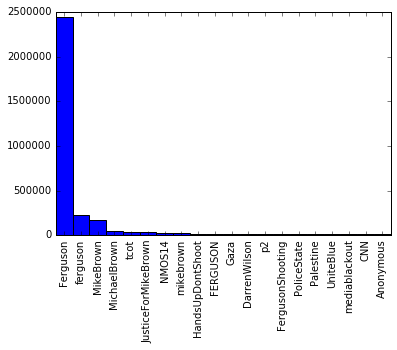

In [19]:
plt.bar(range(len(counts[0:20])), counts[0:20], width = 1)
plt.xticks([x+0.5 for x in range(len(counts[0:20]))], hashtags[0:20], rotation='vertical')

In [64]:
#This works if we don't care about time stuff. 
def ReadAndAggregateIntervals(linesAtATime,filepath):
    start = time.time()
    i = 0
    data = []
    hashtagsDict = {}
    HashtagKey = namedtuple("HashtagKey", ["DoM", "Hour", "Text"])
    
    with open(filename) as cleanedTweets:
        for tweet in cleanedTweets:
            i += 1
            jsonline = json.loads(tweet)
            data.append(jsonline)
            #aggregate
            if (i % linesAtATime == 0):
                print i
                df = pd.DataFrame(data=data)
                df['DoM'] = df['created_at'].apply(lambda x: str(x)[8:10:])
                df['Hour'] = df['created_at'].apply(lambda x: int(str(x)[11:13:]))
#                 df['Minute'] = df['created_at'].apply(lambda x: int(str(x)[14:16:]))
                
                #create a dictionary of month, day of month, hour, hashtag, to count
                allHashtags = df.entities_hashtags_text.tolist()
                
                for index,tweet in df.iterrows():
                    for hashtag in tweet['entities_hashtags_text']:
                        hashtagsDict[HashtagKey(
                                tweet["DoM"], 
                                tweet["Hour"], 
                                hashtag.upper())] = hashtagsDict.get((tweet["DoM"],
                                                             tweet["Hour"],
                                                             hashtag.upper()), 0) + 1
                
                data = []
    return hashtagsDict

In [42]:
aggDict = ReadAndAggregateIntervals(100000,filename)

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000


In [29]:
test = pd.read_pickle('./data.pkl')

In [44]:
aggDict

{HashtagKey(DoM='15', Hour=2, Text=u'data'): 2,
 HashtagKey(DoM='17', Hour=20, Text=u'sundowntown'): 1,
 HashtagKey(DoM='21', Hour=0, Text=u'gopFAIL'): 1,
 HashtagKey(DoM='19', Hour=11, Text=u'NationalRoundup'): 1,
 HashtagKey(DoM='14', Hour=18, Text=u'TheWholeWorldisWatching'): 1,
 HashtagKey(DoM='20', Hour=20, Text=u'iHQ'): 1,
 HashtagKey(DoM='19', Hour=15, Text=u'justiceforformikebrown'): 1,
 HashtagKey(DoM='21', Hour=1, Text=u'UniteRight'): 1,
 HashtagKey(DoM='19', Hour=20, Text=u'wearethepeople'): 1,
 HashtagKey(DoM='15', Hour=1, Text=u'TheWrap'): 1,
 HashtagKey(DoM='21', Hour=3, Text=u'TheFeedSBS2'): 3,
 HashtagKey(DoM='19', Hour=13, Text=u'Fe'): 2,
 HashtagKey(DoM='15', Hour=3, Text=u'80s'): 1,
 HashtagKey(DoM='18', Hour=2, Text=u'FLASHBACK'): 1,
 HashtagKey(DoM='20', Hour=7, Text=u'whiteallies'): 2,
 HashtagKey(DoM='19', Hour=14, Text=u'LHHATL'): 3,
 HashtagKey(DoM='19', Hour=19, Text=u'Idiots'): 6,
 HashtagKey(DoM='14', Hour=15, Text=u'HU'): 23,
 HashtagKey(DoM='17', Hour=22, 

In [86]:
def plotHashtags(DoM, Hour,nHashTags=20):
#     print(DoM,Hour)
    timeHashtags = {key: value for key,value in aggDict.items() if (key.DoM == str(DoM) and key.Hour == Hour)}
#     print timeHashtags
    sortedByCount = sorted(timeHashtags.items(), key=lambda x: (x[1],x[0].Text), reverse=True)
#     print(sortedByCount)
    dictList = [list(t) for t in zip(*sortedByCount)]
    hashtags = [x.Text for x in dictList[0]]
    counts = dictList[1]
#     print counts[0:nHashTags]
    plt.title('Hashtag Distribution (Dec {0} at {1})'.format(DoM, Hour))
    plt.ylabel('Number of Tweets')
    plt.bar(range(len(counts[0:nHashTags])), counts[0:nHashTags], width = 1)
    plt.xticks([x+0.5 for x in range(len(counts[0:nHashTags]))], hashtags[0:nHashTags], rotation='vertical')

<function __main__.plotHashtags>

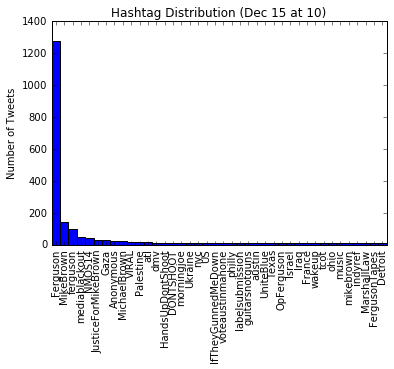

In [87]:
DoM = widgets.IntSlider(min=10, max=27, value=15)
Hour = widgets.IntSlider(min=0, max=23, value=10)
nHashTags = widgets.IntSlider(min=0, max=40, value=50)
widgets.interact(plotHashtags, DoM=DoM, Hour=Hour, nHashTags=nHashTags)